# Batch Normalization - Implementation in Keras
* Notebook by Adam Lang
* Date: 2/27/2024

# What is batch normalization?
* Batch normalization "normalizes" the activation functions of specific hidden layers.
* This can help speed up the model training process.
* The mean and standard deviation are used to normalize the activation functions.

# Steps to perform batch normalization in a hidden layer
1. Take mean of all activations of a particular layer. Take sum of activations and divide them by the number of neurons in the hidden layer and calculate the mean.

2. Calculate standard deviation.


3. Normalize activation functions using normalization equation (hi norm).
* This makes mean and standard deviations 0 and 1 respectively.

4. We don't want all hidden layers to have same distribution.
* gamma + beta equation with learnable parameters.

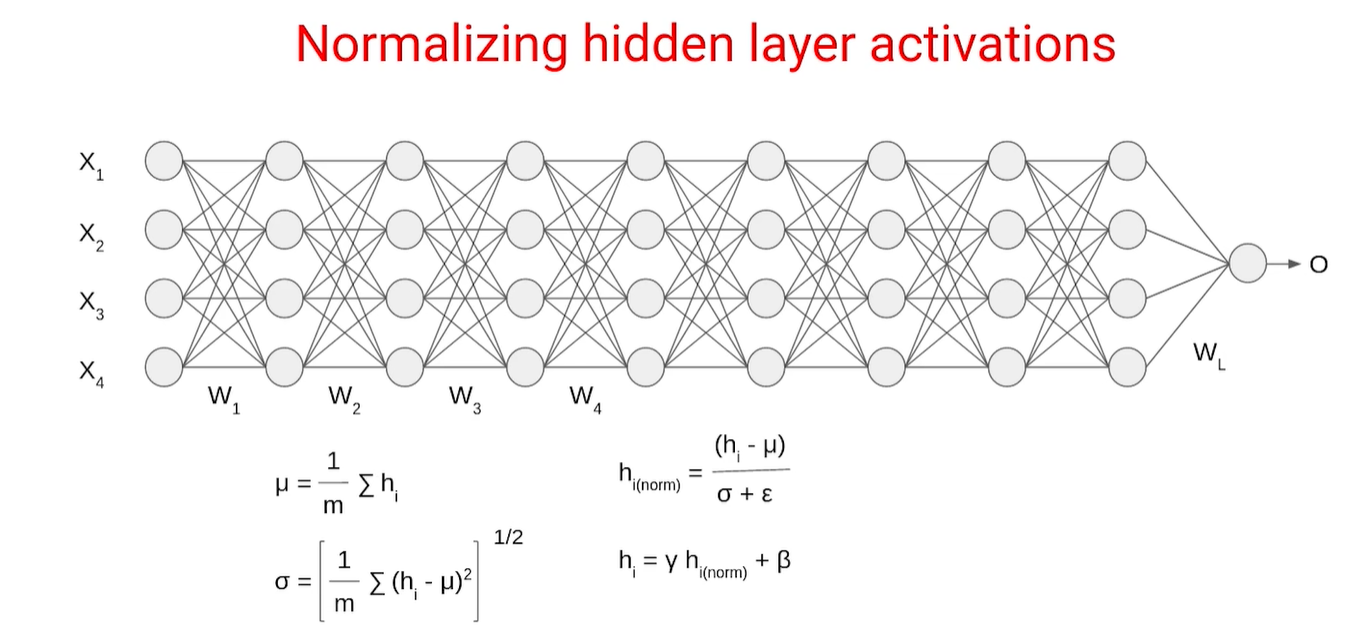

# Steps to use batch normalization to build neural network for image classification problem
1. Load dataset
2. Pre-process data
3. Create training and validation set
4. Define model architecture => **Add Batch Normalization layer(s)**
5. Compile model
6. Train model
7. Evaluate model performance

# 1. Load dataset

In [1]:
# import libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validtion set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
# unmount google drive
# from google.colab import drive
# drive.flush_and_unmount()

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### git commands to find file and unzip dataset

In [3]:
ls

drive/  sample_data/


In [10]:
cd Deep\ Learning\ Notebooks

/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks


In [12]:
ls

 Batch_Normalization_Keras_implementation.ipynb
 brain_test.hdr
 brain_test.img
 Converting_image_file_formats_with_scikit-image.ipynb
 Converting_images_into_different_formats.ipynb
 Converting_images_into_different_formats.zip
 Dailog-dataset.dialogs_dataset
 Dataset.zip
 dog.jpg
 Extracting_Edges_from_Images.ipynb
 Extracting_Edges.ipynb
 image_gray.png
 Keras_neural_network_Image_Classification_Problem_with_Early_Stopping.ipynb
 Keras_neural_network_Image_Classification_with_Dropout_Regularization.ipynb
 Keras_neural_network_Image_Classification_with_Vanishing_and_Exploding_Gradients.ipynb
 LSTM_Text_Generation_with_Neural_Language_Modeling.ipynb
 mid_alpha.png
'Reading and Stacking Images - Using scikit-image and nibabel.ipynb'
 RGBA_image.png
 someones_epi.nii
'Weight Initialization Techniques for Deep Learning in Keras.ipynb'


In [13]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg  
  inflating: Dataset/

In [14]:
# read in dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/Dataset/emergency_classification.csv')

In [15]:
# create random num generator for reproducible results
seed = 42

In [16]:
# load images to numpy array

# empty list to store images
X = []

# iterate over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

# converting list of images to numpy array
X=np.array(X)

# storing target variable in separate variable
y = data.emergency_or_not.values

# 2. Pre-process data

In [17]:
# convert 3 dim image to 1 dim image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [18]:
# normalize pixel values
X = X / X.max()

# min and max pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

# 3. Creating training and validation sets

In [19]:
# create a training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=seed)

In [20]:
# shape of training and valid sets
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# 4. Define model architecture
* Without Batch Normalization layer

In [21]:
# defining model architecture without batch norm
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,))) #input layer
model.add(Dense(100, activation='sigmoid')) #hidden layer 1
model.add(Dense(100, activation='sigmoid')) #hidden layer 2
model.add(Dense(units=1, activation='sigmoid')) #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


summary:
* We can see 100 neurons in the hidden layers.
* We can see all of the trainable parameters.

# 5. Compiling the model

In [34]:
# define the adam optimizer and set learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [23]:
# compile model

# define loss as binary cross entropy => binary classification problem
# define optimizer as Adam
# define metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 6. Train the model

In [24]:
# train model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 6s 195ms/step - loss: 0.6973 - accuracy: 0.5535 - val_loss: 0.7027 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 89ms/step - loss: 0.6756 - accuracy: 0.5851 - val_loss: 0.6739 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 112ms/step - loss: 0.6669 - accuracy: 0.5930 - val_loss: 0.6639 - val_accuracy: 0.5623
Epoch 4/50
13/13 [==============================] - 1s 88ms/step - loss: 0.6551 - accuracy: 0.6021 - val_loss: 0.6528 - val_accuracy: 0.6289
Epoch 5/50
13/13 [==============================] - 1s 87ms/step - loss: 0.6449 - accuracy: 0.6513 - val_loss: 0.6454 - val_accuracy: 0.6445
Epoch 6/50
13/13 [==============================] - 1s 109ms/step - loss: 0.6370 - accuracy: 0.6622 - val_loss: 0.6369 - val_accuracy: 0.6742
Epoch 7/50
13/13 [==============================] - 2s 137ms/step - loss: 0.6307 - accuracy: 0.6780 - val_loss: 0.6308 - val_accuracy: 0.6700
Epoch 8/5

# 7. Evaluate model performance without batch normalization

In [25]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 [==============================] - 0s 14ms/step
Accuracy on validation set: 0.7152974504249292


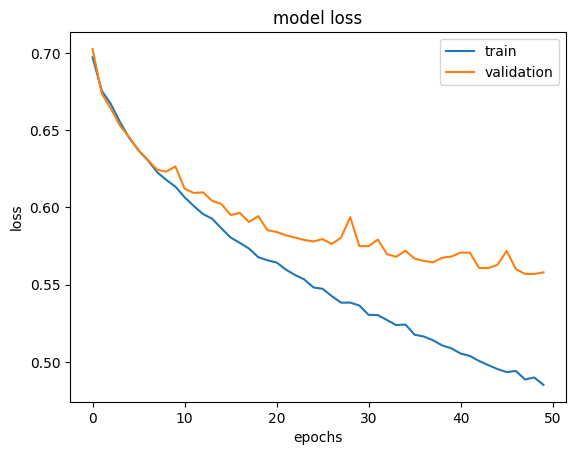

In [26]:
# summarize history for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

summary without batch normalization:
* We can see the model accuracy is above 71%.
* We can also see the model performs well on the validation set until roughly the 10th epoch then it begins to overfit the data, more specifically around the 30th epoch the loss increases and then levels off without improvement whereas the training data the loss continues to decrease.

# Defining a new model architecture **With Batch Normalization**

In [27]:
# import batch normalization layer
from keras.layers import BatchNormalization

In [28]:
# define model architecture and add batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,))) #input layer
model.add(Dense(100, activation='sigmoid')) #hidden layer
model.add(Dense(100, activation='sigmoid')) #hidden layer
model.add(BatchNormalization()) #adding BatchNormalization from keras to normalize the hidden layer activation functions
model.add(Dense(units=1, activation='sigmoid')) #output layer

#print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063501 (57.46 MB)
Trainable params: 15063301 (57.46 MB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


summary: we can now see the batch_normalization layer was added with its respective parameters.

# Compile model

In [35]:
# compile model

# define loss as 'binary_crossentropy' for a binary classification problem
# define optimizer as Adam
# define metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train model with batch normal architecture

In [36]:
# train model for 30 epochs using Batch normalization

model_history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/30
13/13 [==============================] - 6s 204ms/step - loss: 0.6609 - accuracy: 0.6367 - val_loss: 0.7355 - val_accuracy: 0.5609
Epoch 2/30
13/13 [==============================] - 1s 89ms/step - loss: 0.5402 - accuracy: 0.7296 - val_loss: 0.7144 - val_accuracy: 0.5609
Epoch 3/30
13/13 [==============================] - 1s 90ms/step - loss: 0.4729 - accuracy: 0.7898 - val_loss: 0.7022 - val_accuracy: 0.5609
Epoch 4/30
13/13 [==============================] - 1s 84ms/step - loss: 0.4159 - accuracy: 0.8317 - val_loss: 0.6955 - val_accuracy: 0.5609
Epoch 5/30
13/13 [==============================] - 1s 90ms/step - loss: 0.3729 - accuracy: 0.8512 - val_loss: 0.6898 - val_accuracy: 0.5609
Epoch 6/30
13/13 [==============================] - 1s 90ms/step - loss: 0.3369 - accuracy: 0.8748 - val_loss: 0.6965 - val_accuracy: 0.5609
Epoch 7/30
13/13 [==============================] - 1s 89ms/step - loss: 0.2963 - accuracy: 0.9070 - val_loss: 0.6832 - val_accuracy: 0.5609
Epoch 8/30
1

# Evaluate Batch Normalization Model Performance

In [37]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 [==============================] - 0s 11ms/step
Accuracy on validation set: 0.7521246458923513


summary: The model accuracy has improved from 71% to 75% using the batch normalization technique!

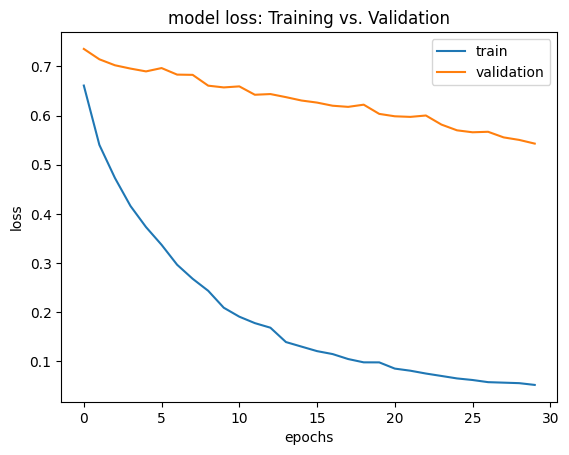

In [38]:
# plot the loss for training vs validation
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss: Training vs. Validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

summary:
* Wow! We can see above how powerful Batch Normalization is.
* The model accuracy improvement was achieved really between 5 to 10 epochs! Thus we did not need to train for more than 10 epochs using Batch Normalization.